In [115]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

import gmaps
import gmaps.datasets
from datetime import date
from datetime import time
import seaborn as sns
from matplotlib.pyplot import figure

sns.set(color_codes=True)

In [108]:
df1 = pd.read_csv("Desktop/LA Citations 2018/LA-Crime-Project-2018/out2.csv")

/Users/Andres/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
df1.head(10)

,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
0,0,4320468924,2018-01-13T00:00:00,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
1,1,4320468935,2018-01-13T00:00:00,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018
2,2,4320468946,2018-01-13T00:00:00,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
3,3,4320468950,2018-01-13T00:00:00,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
4,4,4320468961,2018-01-13T00:00:00,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
5,5,4320468972,2018-01-13T00:00:00,30.0,CA,201804.0,MAZD,PA,GY,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
6,6,4320468983,2018-01-13T00:00:00,30.0,CA,201901.0,BMW,PA,GY,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
7,7,4320468994,2018-01-13T00:00:00,33.0,CA,201807.0,TOYT,PA,BK,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018
8,8,4320469005,2018-01-13T00:00:00,35.0,CA,201810.0,TOYT,PA,SL,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018
9,9,4320469016,2018-01-13T00:00:00,35.0,CA,201807.0,VOLK,PA,BK,5058 MERIDIAN ST,00611,56.0,80.69B,NO PARKING,73.0,6.499506e+06,1.866887e+06,2018


In [110]:
#remove rows with Nan values

df1.replace(["NaN", 'NaT'], np.nan, inplace = True)
df1 = df1.dropna()

#check Nan values were dropped from Issue Time column

df1[df1["Issue time"].isnull()]

,Unnamed: 0,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year


In [111]:
#remove last four characters - leave hour digits
#add leading zeroes to equalize lenght

df1['Issue time'] = df1['Issue time'].apply(lambda x: str(int(x)).zfill(4))
df1['Issue time'] = df1['Issue time'].map(lambda x: str(x)[:-2])

In [112]:
#verify Issue time is in correct format

df1["Issue time"].sample(10)

41568      05
253443     08
944247     11
419523     03
1329722    08
373624     13
1310642    10
969972     10
1598088    15
1779886    13
Name: Issue time, dtype: object

In [100]:
# group = df1.groupby(['Issue time','Violation code']).agg({"Violation Description":"first","Ticket number":"count"})
# #.sort_values(by='Ticket number',ascending=False)
# group1 = group[group['Ticket number'] > 10000]
# group1

In [101]:
# df1.groupby(df1["Issued Date"].dt.month).count().plot(kind="bar", legend=False, color="b")
# plt.show()

In [113]:
#group by to get citation count per hour

newdf = df1.groupby("Issue time").count()
newdf.sort_values('Issue time', ascending=True)
newdf

,Unnamed: 0,Ticket number,Issue Date,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
Issue time,,,,,,,,,,,,,,,,,
00,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898,18898
01,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632,42632
02,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973,41973
03,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141,26141
04,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608,24608
05,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897,16897
06,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882,26882
07,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302,41302
08,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627,231627


In [114]:
#new df for graph data

final_chart1 = newdf[["Ticket number"]]
final_chart1= final_chart1.rename(index={"00":"12am","01":"1am","02":"2am","03":"3am","04":"4am","05":"5am","06":"6am","07":"7am","08":"8am","09":"9am","10":"10am","11":"11am","12":"12pm","13":"1pm","14":"2pm","15":"3pm","16":"4pm","17":"5pm","18":"6pm","19":"7pm","20":"8pm","21":"9pm","22":"10pm","23":"11pm"})
final_chart1

,Ticket number
Issue time,
12am,18898
1am,42632
2am,41973
3am,26141
4am,24608
5am,16897
6am,26882
7am,41302
8am,231627


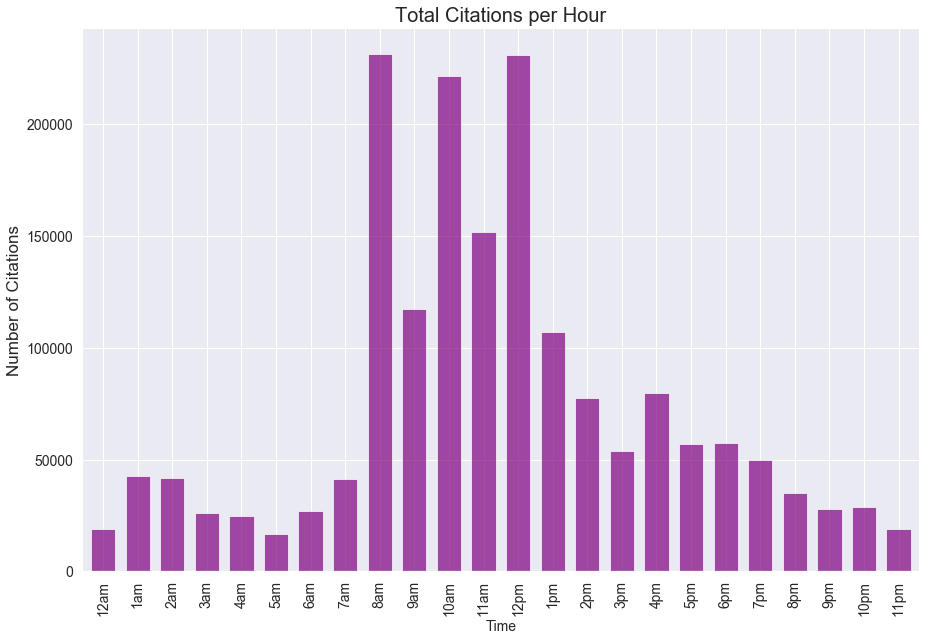

In [125]:
#build chart

final_chart1.plot(kind='bar',legend=False,color="purple",width=.7, alpha=0.7, figsize=(15,10), fontsize=14)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations per Hour",fontsize=20)

plt.savefig("hourly_citations.png")

plt.show()

## Analysis
The graph shows a drastic jump in issued tickets starting at 8am and lasting throughout noon, wherafter the number of citations start to decrease. Most of the citations were issued at 8am, 10am, and noon.